In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.ticker import ScalarFormatter
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [2]:
k_folds = 5

Read in Stroke Dataset

In [3]:
strokeDatasetURL = 'https://raw.githubusercontent.com/JosiahJoeking/Stroke-Dataset/main/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(strokeDatasetURL)

Calculate Average of stroke

In [4]:
strokeAVG = df.loc[:, 'stroke'].mean()

In [5]:
BMI_avg = df.loc[:, 'bmi'].mean()
df = df.fillna(value = BMI_avg)

df.drop(columns=['id'], inplace=True)

nan_df = df[df.isna().any(axis=1)]
no_nan_df = df.dropna()

In [6]:
df_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
df_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,17.0,0,0,92.97,28.893237,0,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False
1,13.0,0,0,85.81,18.600000,0,True,False,False,True,...,False,False,False,True,True,False,True,False,False,False
2,55.0,0,0,89.17,31.500000,0,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
3,42.0,0,0,98.53,18.500000,0,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
4,31.0,0,0,108.89,52.300000,0,True,False,False,True,...,False,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,57.0,1,0,129.54,60.900000,0,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
5106,19.0,0,0,90.57,24.200000,0,True,False,False,True,...,False,True,False,False,False,True,True,False,False,False
5107,45.0,0,0,172.33,45.300000,0,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
5108,53.0,1,0,62.55,30.300000,1,True,False,False,False,...,False,True,False,False,False,True,True,False,False,False


### Normal

In [7]:
inputs = df_encoded.drop("stroke", axis=1).copy()
target = df_encoded["stroke"]

X = inputs.values
y = target.values

kf = KFold(n_splits = k_folds)
kf.get_n_splits(X)

5

In [8]:
lr = LogisticRegression(random_state=42, max_iter = 2000)

In [9]:
acc_score = []
f1_score_array = []

cm = np.zeros((2, 2))


classification_reports = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lr.fit(X_train, y_train)

    pred_values = lr.predict(X_test)

    cm += confusion_matrix(y_test, pred_values)

    report = classification_report(y_test, pred_values)

    classification_reports.append(report)

    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    f1 = f1_score(pred_values,  y_test)
    f1_score_array.append(f1)

avg_acc_score = np.mean(acc_score)

print('Confusion matrix:')
print(cm)

print('\nClassification Reports:')
for fold_idx, report in enumerate(classification_reports):
    print('Classification Report for fold', fold_idx + 1, ':')
    print(report)

avg_acc_score = sum(acc_score)/k_folds

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg F1 : {}'.format(np.mean(f1_score_array)))
tn, fp, fn, tp = cm.ravel()
wicm = (10*fn + fp)/(tn + fp + fn + tp)
print('Weighted incorrect classification metric: {}'.format(wicm))

c:\Users\josia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Confusion matrix:
[[4.86e+03 1.00e+00]
 [2.48e+02 1.00e+00]]

Classification Reports:
Classification Report for fold 1 :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       969
           1       0.00      0.00      0.00        53

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

Classification Report for fold 2 :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       1.00      0.02      0.05        42

    accuracy                           0.96      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.96      0.96      0.94      1022

Classification Report for fold 3 :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.00      0.00      0.00   

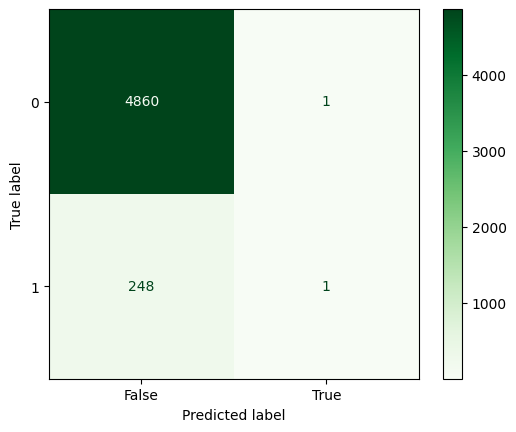

In [10]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(values_format="0.0f", cmap='Greens')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
plt.show()

### Over Sampling

In [11]:
smote = SMOTE(random_state = 42)

In [12]:
shuffled_df = df_encoded.sample(frac=1, random_state=42)
shuffled_df.reset_index(inplace=True)
shuffled_df.drop(columns=['index'], inplace=True)

In [13]:
inputs = shuffled_df.drop("stroke", axis=1).copy()
target = shuffled_df["stroke"]

X = inputs.values
y = target.values

kf = KFold(n_splits = k_folds)
kf.get_n_splits(X)

5

In [14]:
acc_score = []
f1_score_array = []


cm = np.zeros((2, 2))


classification_reports = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    lr.fit(x_train_smote, y_train_smote)

    pred_values =lr.predict(X_test)

    cm += confusion_matrix(y_test, pred_values)

    report = classification_report(y_test, pred_values)

    classification_reports.append(report)

    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

    f1 = f1_score(pred_values,  y_test)
    f1_score_array.append(f1)

avg_acc_score = np.mean(acc_score)

print('Confusion matrix:')
print(cm)

print('\nClassification Reports:')
for fold_idx, report in enumerate(classification_reports):
    print('Classification Report for fold', fold_idx + 1, ':')
    print(report)

avg_acc_score = sum(acc_score)/k_folds

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg F1 : {}'.format(np.mean(f1_score_array)))
tn, fp, fn, tp = cm.ravel()
wicm = (10*fn + fp)/(tn + fp + fn + tp)
print('Weighted incorrect classification metric: {}'.format(wicm))

Confusion matrix:
[[3609. 1252.]
 [  54.  195.]]

Classification Reports:
Classification Report for fold 1 :
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       971
           1       0.15      0.82      0.26        51

    accuracy                           0.77      1022
   macro avg       0.57      0.79      0.56      1022
weighted avg       0.95      0.77      0.83      1022

Classification Report for fold 2 :
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       978
           1       0.10      0.66      0.17        44

    accuracy                           0.73      1022
   macro avg       0.54      0.70      0.51      1022
weighted avg       0.94      0.73      0.81      1022

Classification Report for fold 3 :
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       973
           1       0.13      0.84      0.23        49

   

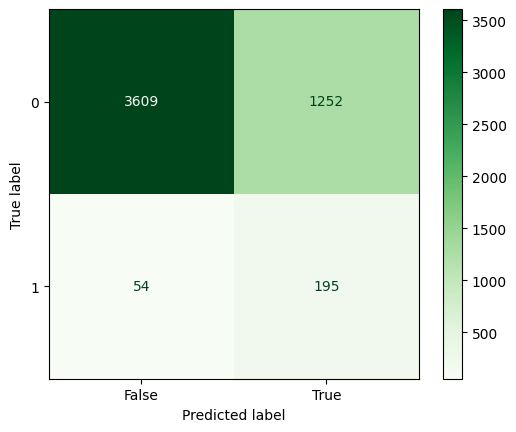

In [15]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(values_format="0.0f", cmap='Greens')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
plt.show()

### Under Sampling

In [16]:
pos = df_encoded[df_encoded['stroke']==1]
neg = df_encoded[df_encoded['stroke']==0]

neg = neg.head(pos.shape[0])
df_undersample = pd.concat([pos,neg],axis=0)
df_undersample = shuffle(df_undersample , random_state=42)
df_undersample.reset_index(drop=True, inplace=True)

inputs = df_undersample.drop('stroke', axis=1).copy()
target = df_undersample['stroke']

In [17]:
X = inputs.values
y = target.values

kf = KFold(n_splits = k_folds)
kf.get_n_splits(X)

5

In [18]:
acc_score = []
f1_score_array = []


cm = np.zeros((2, 2))


classification_reports = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    lr.fit(x_train_smote, y_train_smote)

    pred_values =lr.predict(X_test)

    cm += confusion_matrix(y_test, pred_values)

    report = classification_report(y_test, pred_values)

    classification_reports.append(report)

    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)

    f1 = f1_score(pred_values,  y_test)
    f1_score_array.append(f1)

avg_acc_score = np.mean(acc_score)

print('Confusion matrix:')
print(cm)

print('\nClassification Reports:')
for fold_idx, report in enumerate(classification_reports):
    print('Classification Report for fold', fold_idx + 1, ':')
    print(report)

avg_acc_score = sum(acc_score)/k_folds

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg F1 : {}'.format(np.mean(f1_score_array)))
tn, fp, fn, tp = cm.ravel()
wicm = (10*fn + fp)/(tn + fp + fn + tp)
print('Weighted incorrect classification metric: {}'.format(wicm))

Confusion matrix:
[[179.  70.]
 [ 56. 193.]]

Classification Reports:
Classification Report for fold 1 :
              precision    recall  f1-score   support

           0       0.78      0.73      0.76        49
           1       0.76      0.80      0.78        51

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100

Classification Report for fold 2 :
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        45
           1       0.79      0.80      0.79        55

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100

Classification Report for fold 3 :
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        57
           1       0.67      0.74      0.70        43

    acc

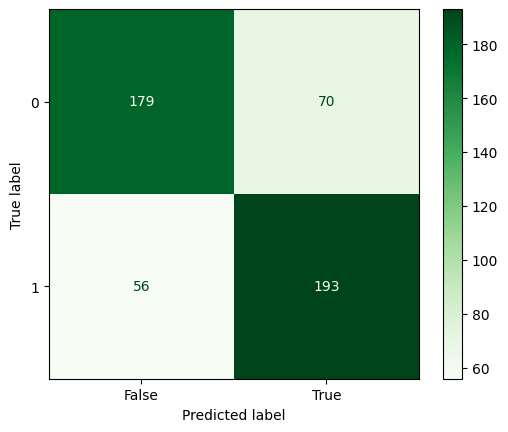

In [19]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(values_format="0.0f", cmap='Greens')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
plt.show()